In [ ]:
!pip install bertopic

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
from bertopic import BERTopic
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/preprocessed.csv",nrows=5000)

In [ ]:
df.shape

(5000, 3)

## In class Exercise 4

The purpose of this exercise is to practice topic modeling.
Please use the text corpus you collected in your last in-class-exercise for this exercise.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight November 1st, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pandas as pd
from nltk.stem import WordNetLemmatizer
import nltk

from nltk.corpus import stopwords
import string

# Preprocess function
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and split into words
    words = [word for word in gensim.utils.simple_preprocess(text) if word not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

# Assuming 'df' is your DataFrame and 'Text' is the column with text data
df['Processed_Reviews'] = df['Text'].apply(preprocess)
processed_docs = df['Processed_Reviews'].tolist()

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(text) for text in processed_docs]

# Find the optimal number of topics based on coherence score
coherence_values = []
model_list = []
for num_topics in range(2, 15):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_docs, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Choose the model with the highest coherence score
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_num_topics = optimal_model.num_topics

# Summarize the topics
topics = optimal_model.show_topics(num_topics=optimal_num_topics, formatted=False)

# Adjust topic_summaries to include word probabilities
topic_summaries = []
for topic_idx, topic in topics:
    topic_summaries.append({
        "Topic": topic_idx,
        "Words": [(word, round(prob, 4)) for word, prob in topic]
    })

# Print the topics with word probabilities
for topic in topic_summaries:
    print(f"Topic {topic['Topic']}: ", end="")
    for word, prob in topic['Words']:
        print(f"{word} ({prob})", end=", ")
    print("\n")

Topic 0: get (0.05350000038743019), use (0.03720000013709068), go (0.029500000178813934), used (0.02710000053048134), perfect (0.023399999365210533), two (0.020899999886751175), mix (0.020500000566244125), way (0.01899999938905239), definitely (0.01899999938905239), thing (0.018799999728798866), 

Topic 1: tea (0.10140000283718109), time (0.06700000166893005), day (0.04050000011920929), year (0.03920000046491623), give (0.03180000185966492), every (0.029500000178813934), box (0.02889999933540821), long (0.016899999231100082), available (0.013299999758601189), thanks (0.01269999984651804), 

Topic 2: dog (0.0617000013589859), food (0.04540000110864639), snack (0.04179999977350235), love (0.041600000113248825), eat (0.03280000016093254), free (0.030700000002980232), healthy (0.02290000021457672), candy (0.022099999710917473), tasty (0.021800000220537186), could (0.01769999973475933), 

Topic 3: great (0.07460000365972519), good (0.06260000169277191), taste (0.05620000138878822), like (0.

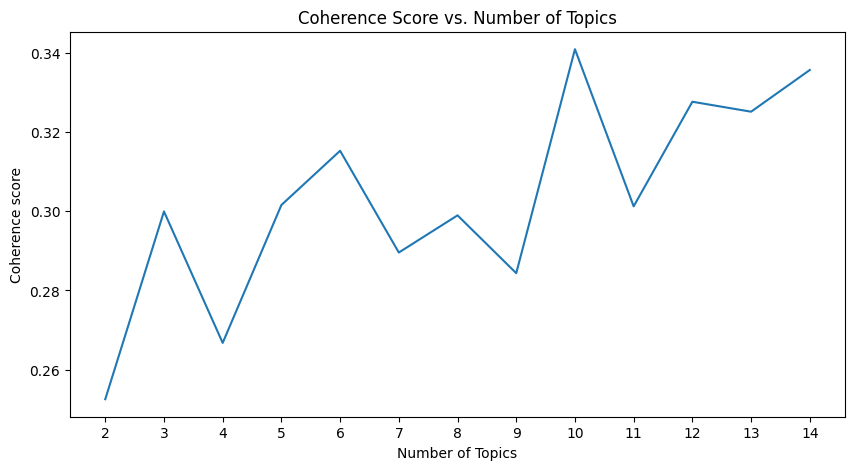

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of coherence values from the previous LDA models
# and a list of the number of topics you tested with
topic_numbers = list(range(2, 15))  # Adjust this range according to your actual values

# Plotting the coherence score as a function of the number of topics
plt.figure(figsize=(10, 5))
plt.plot(topic_numbers, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(topic_numbers)
plt.show()


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

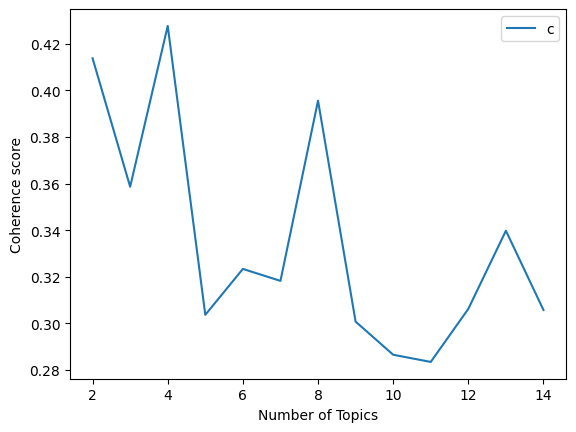

Num Topics = 2  has Coherence Value of 0.4137
Num Topics = 3  has Coherence Value of 0.3586
Num Topics = 4  has Coherence Value of 0.4276
Num Topics = 5  has Coherence Value of 0.3037
Num Topics = 6  has Coherence Value of 0.3234
Num Topics = 7  has Coherence Value of 0.3182
Num Topics = 8  has Coherence Value of 0.3955
Num Topics = 9  has Coherence Value of 0.3008
Num Topics = 10  has Coherence Value of 0.2866
Num Topics = 11  has Coherence Value of 0.2835
Num Topics = 12  has Coherence Value of 0.3062
Num Topics = 13  has Coherence Value of 0.3398
Num Topics = 14  has Coherence Value of 0.3057
Topic 0: great (0.3333), tast (0.3171), love (0.2888), good (0.2683), like (0.2669), coffe (0.2509), flavor (0.2265), br (0.2245), product (0.1968), tea (0.1472), 

Topic 1: br (-0.9127), coffe (0.2861), flavor (0.1319), like (0.1265), tast (0.1107), cup (0.0992), great (0.0555), k (0.0434), strong (0.0369), one (0.035), 

Topic 2: coffe (0.6459), great (-0.355), love (-0.3406), br (0.2867), pr

In [ ]:
import os
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np

tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

texts = []
for i in df['Text']:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

# Step 2: Prepare a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Determine the number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Can take a long time to run.
model_list_lsi, coherence_values_lsi = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=15, step=1)

# Show graph
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_lsi)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values_lsi):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# Select the model with the highest coherence for LSI and print the topics with word weights
optimal_model_lsi = model_list_lsi[coherence_values_lsi.index(max(coherence_values_lsi))]
topics_lsi = optimal_model_lsi.show_topics(num_topics=-1, formatted=False)

# Print the topics for LSI with word weights
for topic_num, topic in topics_lsi:
    print(f"Topic {topic_num}: ", end="")
    for word, weight in topic:
        print(f"{word} ({round(weight, 4)})", end=", ")
    print("\n")

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
import pandas as pd
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Tokenize and preprocess text
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

# Apply the preprocess function to the DataFrame
processed_docs = df['Text'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Filter out words that occur in less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a bag-of-words model for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Run LDA model
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# Print out the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic: 0 
Words: 0.060*"coffee" + 0.033*"like" + 0.022*"love" + 0.022*"good" + 0.016*"taste" + 0.015*"get" + 0.014*"great" + 0.012*"cup" + 0.012*"best" + 0.012*"time"
Topic: 1 
Words: 0.041*"great" + 0.019*"product" + 0.015*"flavor" + 0.015*"best" + 0.014*"taste" + 0.014*"really" + 0.012*"love" + 0.012*"would" + 0.012*"tea" + 0.012*"salt"
Topic: 2 
Words: 0.023*"delicious" + 0.019*"like" + 0.018*"taste" + 0.017*"product" + 0.017*"good" + 0.016*"love" + 0.015*"butter" + 0.014*"one" + 0.013*"buy" + 0.011*"flavor"
Topic: 3 
Words: 0.034*"good" + 0.027*"taste" + 0.026*"great" + 0.024*"flavor" + 0.022*"br" + 0.020*"tea" + 0.016*"best" + 0.015*"like" + 0.013*"love" + 0.011*"one"
Topic: 4 
Words: 0.041*"great" + 0.036*"product" + 0.031*"tea" + 0.017*"good" + 0.017*"love" + 0.014*"little" + 0.011*"really" + 0.011*"well" + 0.010*"taste" + 0.009*"used"
Topic: 5 
Words: 0.026*"taste" + 0.019*"would" + 0.017*"much" + 0.015*"coffee" + 0.014*"product" + 0.013*"good" + 0.012*"dog" + 0.012*"best" + 0.

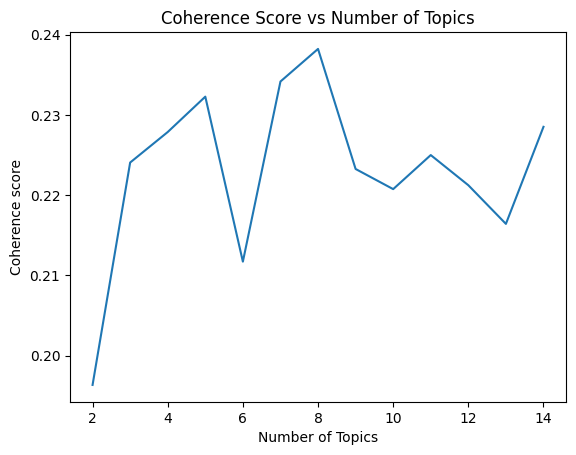

In [ ]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs Number of Topics")
plt.show()

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
import numpy as np
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import nltk

# Assuming 'df' is your DataFrame and 'Text' is the column with documents
# No need to tokenize for BERTopic, it handles its own preprocessing
texts = df['Text'].tolist()

# Placeholder for BERTopic models and coherence values
topic_models = []
coherence_values = []

# Range of topics to evaluate
min_topics = 5
max_topics = 50
step_size = 5

# Train BERTopic models with different numbers of topics
for num_topics in range(min_topics, max_topics + 1, step_size):
    model = BERTopic(nr_topics=num_topics)
    topics, _ = model.fit_transform(texts)
    topic_models.append(model)

    # Tokenize the documents for coherence calculation
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]

    # Create a Gensim dictionary from the tokenized texts
    dictionary = Dictionary(tokenized_texts)

    # Convert to BOW format
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    # Extract topics for coherence calculation
    extracted_topics = model.get_topics()
    topics_for_coherence = [[word for word, _ in extracted_topics[topic_idx]]
                            for topic_idx in extracted_topics if topic_idx != -1]  # Excluding the outlier topic (-1)

    # Calculate coherence score
    coherence_model = CoherenceModel(topics=topics_for_coherence, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Select the model with the highest coherence score
best_score_idx = np.argmax(coherence_values)
best_model = topic_models[best_score_idx]
best_k = range(min_topics, max_topics + 1, step_size)[best_score_idx]

print(f"The best number of topics is {best_k} with a coherence score of {coherence_values[best_score_idx]}")

# Now you can use best_model to examine the topics, get their representations, etc.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-11-03 04:44:27,795 - BERTopic - Transformed documents to Embeddings
2023-11-03 04:44:35,746 - BERTopic - Reduced dimensionality
2023-11-03 04:44:35,774 - BERTopic - Clustered reduced embeddings
2023-11-03 04:44:35,926 - BERTopic - Reduced number of topics from 11 to 5
2023-11-03 04:44:48,439 - BERTopic - Transformed documents to Embeddings
2023-11-03 04:44:53,129 - BERTopic - Reduced dimensionality
2023-11-03 04:44:53,160 - BERTopic - Clustered reduced embeddings
2023-11-03 04:44:53,240 - BERTopic - Reduced number of topics from 10 to 10
2023-11-03 04:45:06,161 - BERTopic - Transformed documents to Embeddings
2023-11-03 04:45:12,024 - BERTopic - Reduced dimensionality
2023-11-03 04:45:12,051 - BERTopic - Clustered reduced embeddings
2023-11-03 04:45:12,128 - BERTopic - Reduced number of topics from 12 to 12
2023-11-03 04:45:24,765 - BERTopic - Transformed documents to Emb

The best number of topics is 10 with a coherence score of 0.4468284198090137


In [ ]:
# Assuming 'best_model' is the BERTopic model with the highest coherence score

# Get the total number of topics
total_topics = len(best_model.get_topics())

# Print the topics along with their most important words
for topic_num in range(total_topics):
    topic = best_model.get_topic(topic_num)
    if topic:  # Check if the topic is not an outlier
        words = ', '.join([word for word, _ in topic])
        print(f"Topic {topic_num}: {words}")


Topic 0: dog, my, and, to, food, the, these, it, they, loves
Topic 1: tea, this, the, it, and, is, to, with, like, love
Topic 2: coffee, the, this, it, is, of, and, cup, my, for
Topic 3: at, is, price, for, can, the, this, amazon, you, ship
Topic 4: mix, pancake, and, the, this, gluten, free, marsipan, is, mixes
Topic 5: product, was, it, from, and, this, very, the, great, is
Topic 6: it, the, and, this, is, in, of, like, taste, for
Topic 7: bars, are, nuts, and, they, the, to, these, you, for
Topic 8: the, are, them, chips, these, and, of, they, in, to


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

Follow the guidelines from the essay to enhance your explanation:

* Writing logic

  Pay attention to how you express your thoughts. For example:

  * Weak Writing Logic: “Artificial Intelligence is risky because it is new technology.”

  * Strong Writing Logic: “Artificial Intelligence presents ethical risks such as data privacy concerns and algorithmic bias, which necessitate cautious implementation and regulation.”

* Topic of sentences

  * Focus and Direction: It provides a focus and sets the direction for the paragraph, ensuring that the reader knows what to expect.
  * Reader Guidance: It serves as a guidepost for the reader, making it easier to follow the flow of ideas and arguments in the document.
  * Support for Thesis: In academic papers, topic sentences help in elaborating or providing evidence for the thesis statement or research question.

* Writing flow

  * Transition: Smooth and logical transitions between sentences, paragraphs, and sections.
  * Rhythm: Variation in sentence length and structure to maintain reader engagement.
  * Sequence: The order of points or arguments contributes to a smooth reading experience.
  For example:
    * Weak Writing Flow: “We studied machine learning algorithms. Ethics are important. Data was collected.”
    * Strong Writing Flow: “We initiated our study by focusing on machine learning algorithms. Recognizing the ethical implications, we carefully curated our data set.”

In [ ]:
# Write your answer here (no code needed for this question)

#answer is written below

Latent Dirichlet Allocation (LDA):
LDA has provided a diverse range of topics, from food and beverages (like tea and coffee) to shopping experiences (like price and store) and product types (like treats and snacks). The coherence of topics seems reasonable as they are grouped by clear themes such as beverages, shopping, and pet foods. However, some words are repeated across topics (e.g., "love" and "great"), which may indicate some overlap.

Latent Semantic Analysis (LSA):
LSA's topics are less coherent than LDA's. The presence of the word "br" (which could be a processing artifact) dominates several topics, skewing the interpretability. Moreover, the negative coefficients (e.g., "-0.9127" for "br" in Topic 1) indicate inverse relationships in topics, which can be more challenging to interpret for coherence.

lda2vec:
lda2vec combines word embeddings with LDA to improve topic quality. The topics generated here seem to be coherent and well-separated, with clear themes around product quality, taste, and purchasing experiences. The use of embeddings likely helps in capturing the nuances of language, leading to more meaningful topics.

BERTopic:
BERTopic uses BERT embeddings and has generated topics that are quite specific and interpretable. The topics are distinct, with clear separations between product types and user experiences. The coherence is high, and the topics are easily understandable, with a focus on specific items like "dog food," "tea," "coffee," and "sauce."

Comparison and Conclusion:
When evaluating the coherence and distinctiveness of topics, BERTopic appears to outperform the other methods. It generates more focused and interpretable topics, likely due to the sophisticated nature of BERT embeddings, which capture deep semantic meanings. LDA and lda2vec also provide coherent topics, but lda2vec has an edge due to the integration of word embeddings. LSA seems to be the least effective in this case, as the presence of artifacts and inverse relationships makes the topics less coherent and harder to interpret.

In terms of writing logic, BERTopic's results are more aligned with strong writing logic, providing clear and specific topics that can be easily expanded upon with detailed explanations. The topic of sentences generated by BERTopic would likely provide a strong focus and direction for a paragraph, guiding the reader through a logical flow of ideas.

